## Study the data in order to see the day that we have at leat one register per node

In [2]:
import pandas as pd
demandData = pd.read_csv('meteo/demandData.csv', sep=';')
demandData

,codnode,Pallets,Year,Month,Day,Date
0,167,190.00,2024,3,11,11/03/2024
1,91,50.00,2024,3,11,11/03/2024
2,228,80.00,2024,3,11,11/03/2024
3,164,70.00,2024,3,11,11/03/2024
4,184,200.00,2024,3,11,11/03/2024
...,...,...,...,...,...,...
37768,229,585.77,2022,6,30,30/06/2022
37769,230,248.40,2022,6,30,30/06/2022
37770,231,94.15,2022,6,30,30/06/2022
37771,232,614.92,2022,6,30,30/06/2022


In [3]:
# Comnute the earliest and latest date for each node
demandData['Date'] = pd.to_datetime(demandData['Date'], format='%d/%m/%Y')

min_dates = demandData.groupby('codnode')['Date'].min()
max_dates = demandData.groupby('codnode')['Date'].max()

# Crear un DataFrame con los resultados
date_summary = pd.DataFrame({'min_date': min_dates, 'max_date': max_dates})
date_summary

print('Day from which we ensure we have records of all nodes')
print(date_summary['min_date'].max())

Day from which we ensure we have records of all nodes
2022-07-14 00:00:00


## Number of registers per node

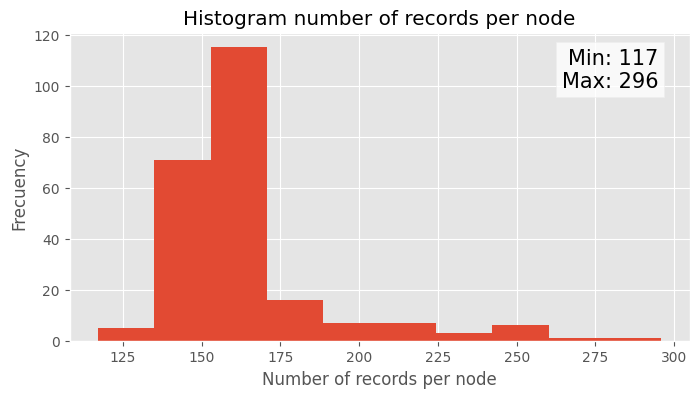

In [4]:
import matplotlib.pyplot as plt

records = demandData.groupby('codnode').size()
records

max_records = records.max()
min_records = records.min()

# Configurar el estilo 'ggplot'
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))

# Crear el histograma
plt.hist(records, bins=10)  # Puedes ajustar el número de contenedores según tus datos

plt.xlabel('Number of records per node')
plt.ylabel('Frecuency')
plt.title('Histogram number of records per node')

plt.text(0.95, 0.95, f'Min: {min_records}\nMax: {max_records}', ha='right', va='top', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8), fontsize=15)

plt.savefig('histogram_node.pdf')

plt.show()

Year
2022    12987
2023    20433
2024     4353
dtype: int64


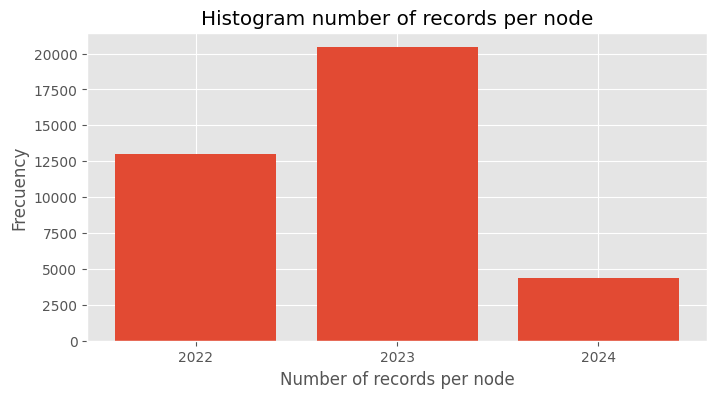

In [5]:
import matplotlib.pyplot as plt

records = demandData.groupby('Year').size()
print(records)

# Configurar el estilo 'ggplot'
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))

# Crear el histograma
plt.bar(['2022', '2023', '2024'], records)  # Puedes ajustar el número de contenedores según tus datos

plt.xlabel('Number of records per node')
plt.ylabel('Frecuency')
plt.title('Histogram number of records per node')

plt.savefig('histogram_year.pdf')

plt.show()

In [9]:
import seaborn as sns
finalDemandData = pd.read_csv('demandDataComplete.csv', sep=';')
# finalDemandData
print(finalDemandData)

       codnode  ZIPcod  Pallets  Year  Month  Day        Date Day Of Week  \
0          167   28046   190.00  2024      3   11  2024-03-11      Monday   
1           91   28029    50.00  2024      3   11  2024-03-11      Monday   
2          228   28100    80.00  2024      3   11  2024-03-11      Monday   
3          164   28902    70.00  2024      3   11  2024-03-11      Monday   
4          184   28108   200.00  2024      3   11  2024-03-11      Monday   
...        ...     ...      ...   ...    ...  ...         ...         ...   
37768      229   28001   585.77  2022      6   30  2022-06-30    Thursday   
37769      230   28232   248.40  2022      6   30  2022-06-30    Thursday   
37770      231   28049    94.15  2022      6   30  2022-06-30    Thursday   
37771      232   28050   614.92  2022      6   30  2022-06-30    Thursday   
37772      233   28901   196.63  2022      6   30  2022-06-30    Thursday   

       Holiday  Tomorrow Holiday  WIND SPEED (m/s)  WIND DIRECTION (°)  \
0

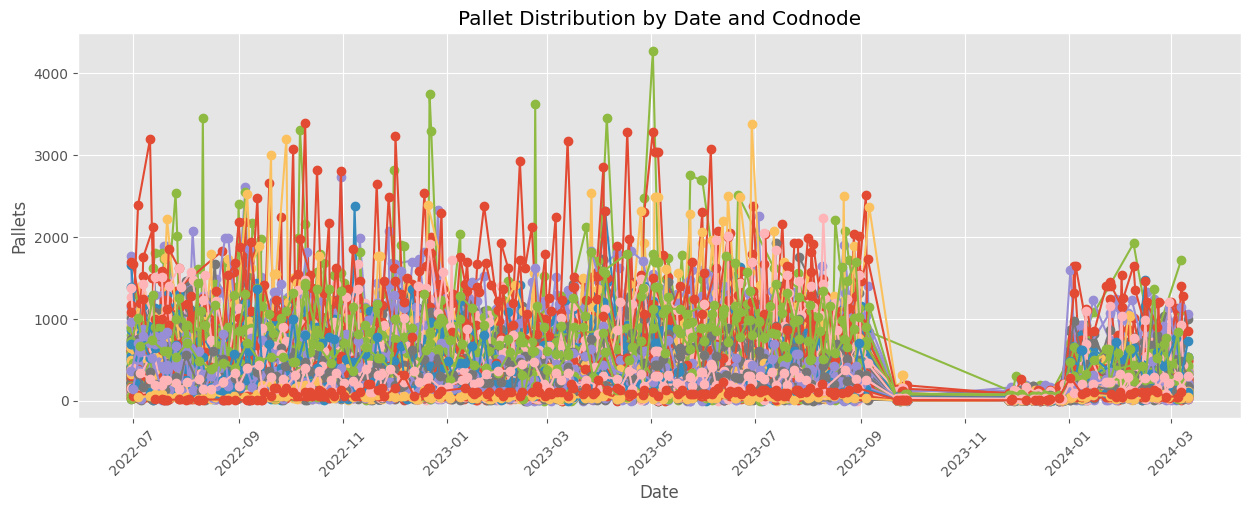

In [24]:
finalDemandData['Date'] = pd.to_datetime(finalDemandData['Date'])
finalDemandData_sorted = finalDemandData.sort_values(by=['Date'])

# Graficar
fig, ax = plt.subplots(figsize=(15, 5))

i = 0
# Iterar sobre cada codnode único en el DataFrame
for codnode in finalDemandData_sorted['codnode'].unique():
    i += 1
    # Filtrar el DataFrame para el codnode actual
    subset = finalDemandData_sorted[finalDemandData_sorted['codnode'] == codnode]
    # Graficar la nube de puntos y las líneas
    ax.plot(subset['Date'], subset['Pallets'], marker='o', label=codnode)
    

# Establecer etiquetas y leyenda
ax.set_xlabel('Date')
ax.set_ylabel('Pallets')
ax.set_title('Pallet Distribution by Date and Codnode')
plt.xticks(rotation=45)

plt.savefig('pallet_date_codnode.pdf')

# Mostrar el gráfico
plt.show()

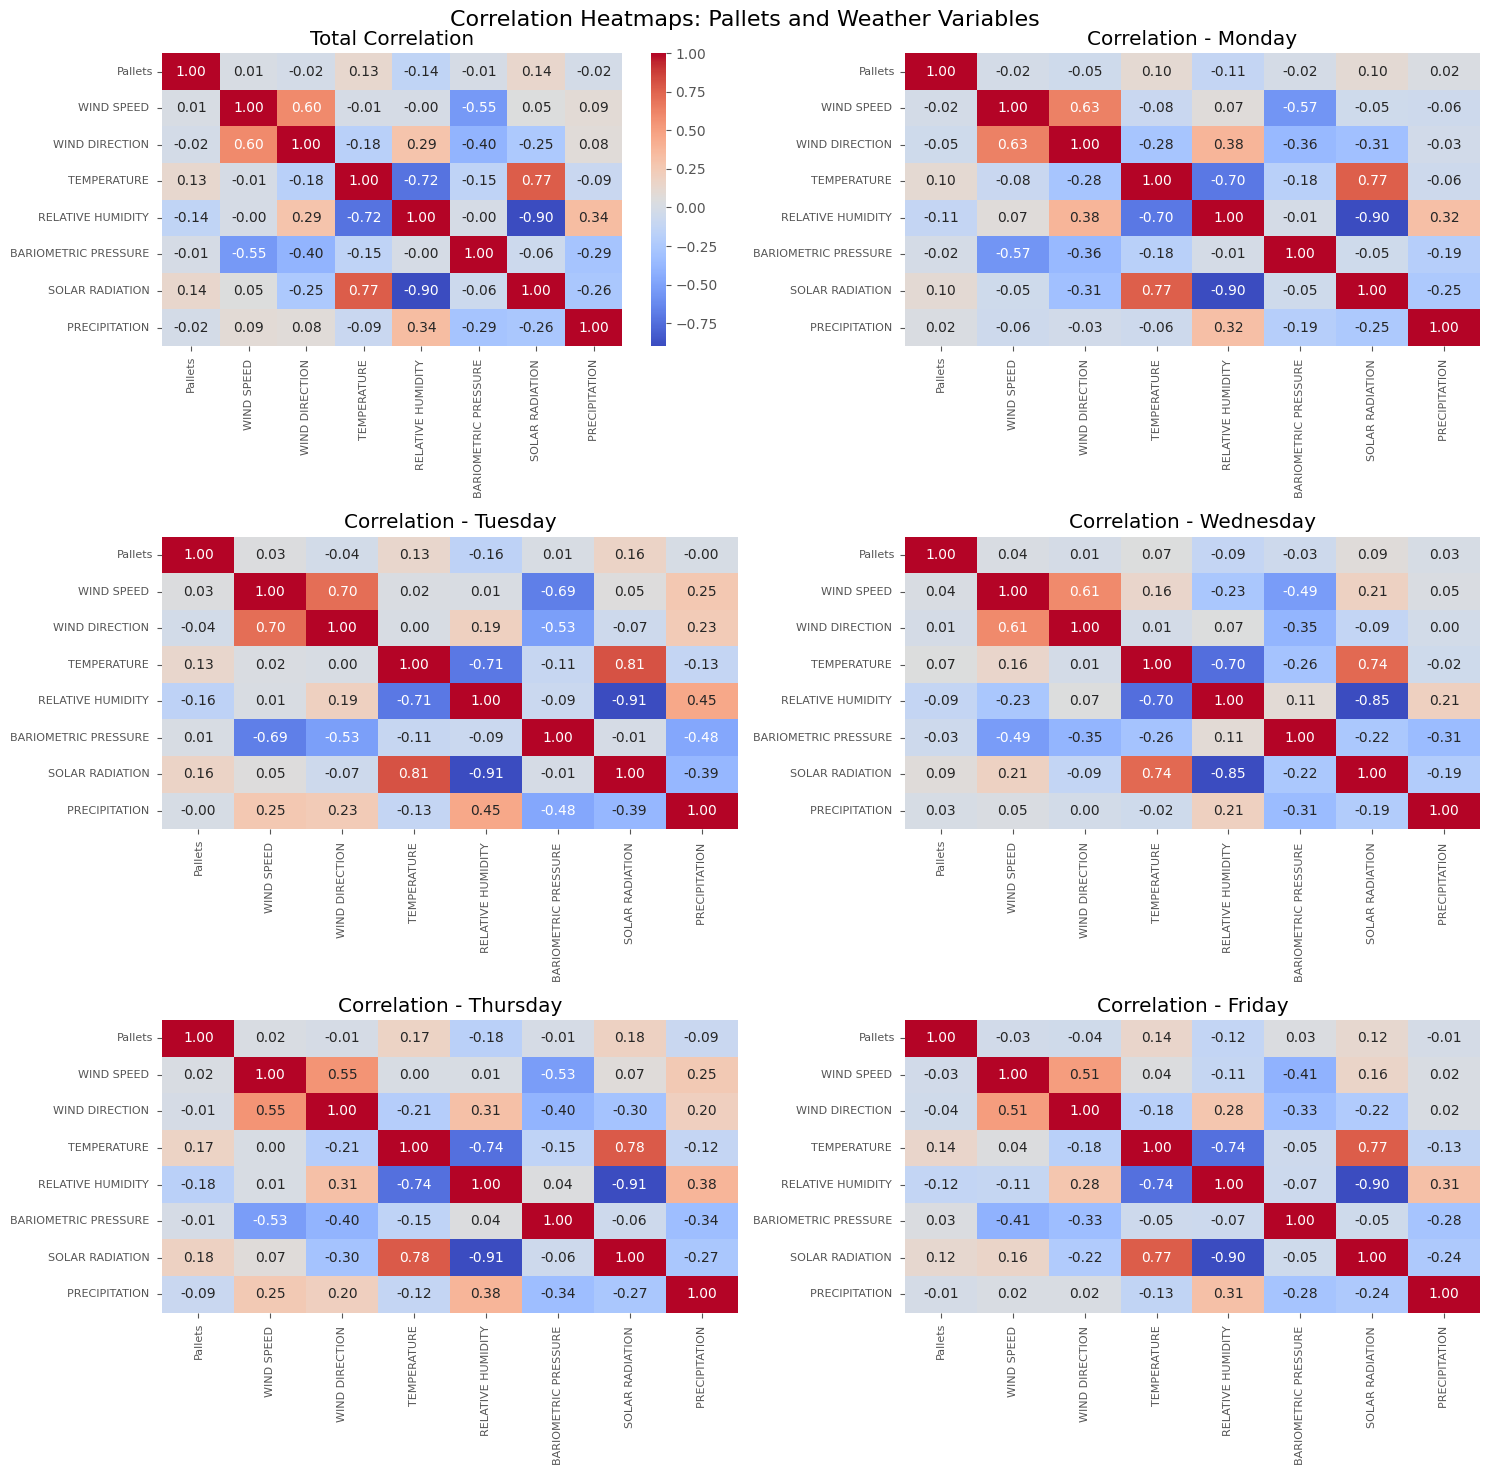

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

## WEATHER
correlation_pallets = finalDemandData[['Pallets', 'WIND SPEED (m/s)',  'WIND DIRECTION (°)', 'TEMPERATURE (ºC)', 'RELATIVE HUMIDITY (%)', 
                                       'BARIOMETRIC PRESSURE (mb)', 'SOLAR RADIATION (W/m2)', 'PRECIPITATION (l/m2)']].corr()

# Título de la figura
# Agrupar por DayOfTheWeek y calcular la matriz de correlación para cada grupo
groups = finalDemandData[finalDemandData['Day Of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby('Day Of Week')

# Crear una figura con una estructura de 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle('Correlation Heatmaps: Pallets and Weather Variables', fontsize=16)
plt.style.use('ggplot')

# Mostrar la matriz de correlación total en la primera celda
sns.heatmap(correlation_pallets, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Total Correlation')
axes[0, 0].set_xticklabels([re.sub(r'\([^)]*\)', '', label.get_text()) for label in axes[0, 0].get_xticklabels()], fontsize=8)
axes[0, 0].set_yticklabels([re.sub(r'\([^)]*\)', '', label.get_text()) for label in axes[0, 0].get_yticklabels()], fontsize=8)


# Iterar sobre cada día de la semana y crear un heatmap en las siguientes celdas
for idx, (name, group) in enumerate(groups):
    correlation_pallets_day_of_week = group[['Pallets', 'WIND SPEED (m/s)', 'WIND DIRECTION (°)', 'TEMPERATURE (ºC)', 
                                              'RELATIVE HUMIDITY (%)', 'BARIOMETRIC PRESSURE (mb)', 
                                              'SOLAR RADIATION (W/m2)', 'PRECIPITATION (l/m2)']].corr()
    if name == 'Monday':
        row = 0
        col = 1
    elif name =='Tuesday':
        row = 1
        col = 0
    elif name =='Wednesday':
        row = 1
        col = 1
    elif name =='Thursday':
        row = 2
        col = 0
    elif name =='Friday':
        row = 2
        col = 1

    sns.heatmap(correlation_pallets_day_of_week, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[row, col], cbar=False)
    axes[row, col].set_title(f'Correlation - {name}')

    # Reducir el tamaño de los labels y mostrar solo la primera palabra
    axes[row, col].set_xticklabels([re.sub(r'\([^)]*\)', '', label.get_text()) for label in axes[row, col].get_xticklabels()], fontsize=8)
    axes[row, col].set_yticklabels([re.sub(r'\([^)]*\)', '', label.get_text()) for label in axes[row, col].get_yticklabels()], fontsize=8)


# Ajustar los espacios entre subplots
plt.tight_layout()

plt.savefig('corrrelation_weather.pdf')

# Mostrar la figura
plt.show()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Título de la figura
# Agrupar por DayOfTheWeek y calcular la matriz de correlación para cada grupo
groups = finalDemandData[finalDemandData['Day Of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby('Day Of Week')

# Crear una figura con una estructura de 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle('Correlation Heatmaps: Pallets and Weather Variables', fontsize=16)
plt.style.use('ggplot')

# Mostrar la matriz de correlación total en la primera celda
sns.heatmap(correlation_pallets, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Total Correlation')
axes[0, 0].set_xticklabels([label.get_text().split()[0] for label in axes[0, 0].get_xticklabels()], fontsize=8)
axes[0, 0].set_yticklabels([label.get_text().split()[0] for label in axes[0, 0].get_yticklabels()], fontsize=8)


# Iterar sobre cada día de la semana y crear un heatmap en las siguientes celdas
for idx, (name, group) in enumerate(groups):
    correlation_pallets_day_of_week = group[['Pallets', 'WIND SPEED (m/s)', , 'WIND DIRECTION (m/s)' 'TEMPERATURE (ºC)', 
                                              'RELATIVE HUMIDITY (%)', 'BARIOMETRIC PRESSURE (mb)', 
                                              'SOLAR RADIATION (W/m2)', 'PRECIPITATION (l/m2)']].corr()
    if name == 'Monday':
        row = 0
        col = 1
    elif name =='Tuesday':
        row = 1
        col = 0
    elif name =='Wednesday':
        row = 1
        col = 1
    elif name =='Thursday':
        row = 2
        col = 0
    elif name =='Friday':
        row = 2
        col = 1

    sns.heatmap(correlation_pallets_day_of_week, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[row, col], cbar=False)
    axes[row, col].set_title(f'Correlation - {name}')

    # Reducir el tamaño de los labels y mostrar solo la primera palabra
    axes[row, col].set_xticklabels([label.get_text().split()[0] for label in axes[row, col].get_xticklabels()], fontsize=8)
    axes[row, col].set_yticklabels([label.get_text().split()[0] for label in axes[row, col].get_yticklabels()], fontsize=8)


# Ajustar los espacios entre subplots
plt.tight_layout()

plt.savefig('corrrelation_weather.pdf')

# Mostrar la figura
plt.show()

SyntaxError: invalid syntax (1659315095.py, line 22)

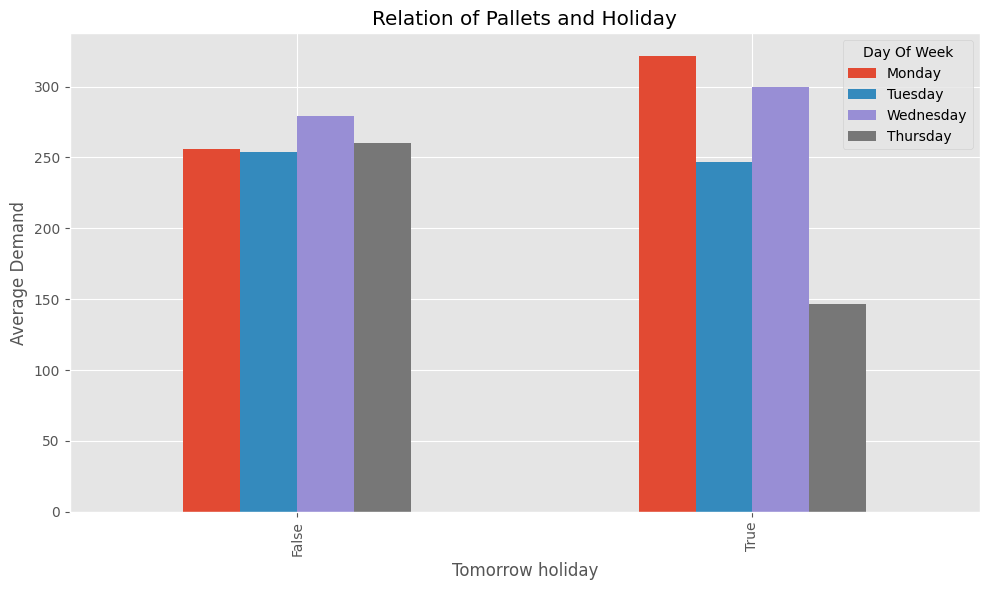

In [ ]:
import matplotlib.pyplot as plt

# Calcular la media de pallets, el día de la semana más frecuente y la moda de 'Tomorrow Holiday' para cada fecha
mean_demand_by_date = finalDemandData.groupby('Date').agg({'Pallets': 'mean', 'Day Of Week': lambda x: x.mode()[0], 'Tomorrow Holiday': lambda x: x.mode()[0]})

# Filtrar los días viernes y sábado del DataFrame
filtered_data = mean_demand_by_date[mean_demand_by_date['Day Of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]

# Calcular la demanda promedio de pallets para cada día por separado
demand_by_tomorrow_holiday = filtered_data.groupby(['Tomorrow Holiday', 'Day Of Week'])['Pallets'].mean().unstack()

# Reordenar las columnas para que aparezcan de lunes a jueves
demand_by_tomorrow_holiday = demand_by_tomorrow_holiday[['Monday', 'Tuesday', 'Wednesday', 'Thursday']]

# Crear una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la demanda promedio de pallets por día, diferenciando entre festivo y no festivo el día siguiente
demand_by_tomorrow_holiday.plot(kind='bar', ax=ax)
ax.set_title('Relation of Pallets and Holiday')
ax.set_xlabel('Tomorrow holiday')
ax.set_ylabel('Average Demand')

plt.tight_layout()
plt.savefig('relation_holiday.pdf')
plt.show()


Index([28944, 28037], dtype='int64', name='ZIPcod')
Index([28942, 28025], dtype='int64', name='ZIPcod')


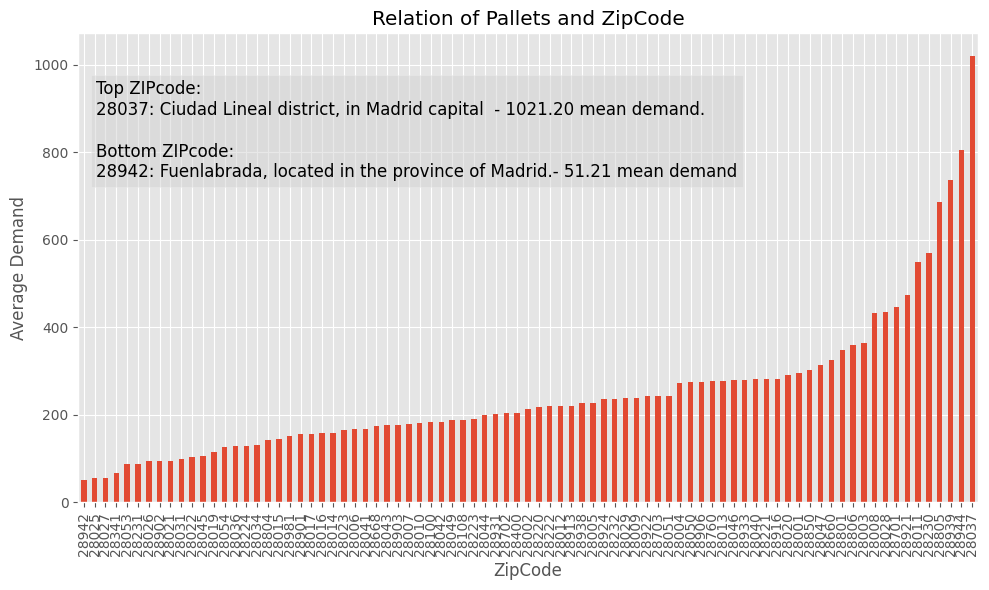

In [ ]:
import matplotlib.pyplot as plt

# Calcular la demanda promedio de pallets por código postal
demand_by_ZIPcod = finalDemandData.groupby('ZIPcod')['Pallets'].mean()

# Ordenar los valores por la demanda promedio de forma creciente
demand_by_ZIPcod_sorted = demand_by_ZIPcod.sort_values()

# Obtener los dos ZIPcodes con mayor y menor demanda
top_ZIPcodes = demand_by_ZIPcod_sorted.tail(2)
print(top_ZIPcodes.index)
bottom_ZIPcodes = demand_by_ZIPcod_sorted.head(2)
print(bottom_ZIPcodes.index)


# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
demand_by_ZIPcod_sorted.plot(kind='bar')
plt.title('Relation of Pallets and ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Average Demand')
plt.tight_layout()

# Agregar cuadro de texto con los ZIPcodes con mayor y menor demanda
text_box = f"Top ZIPcode:\n{top_ZIPcodes.index[1]}: Ciudad Lineal district, in Madrid capital  - {top_ZIPcodes.values[1]:.2f} mean demand.\n\nBottom ZIPcode:\n{bottom_ZIPcodes.index[0]}: Fuenlabrada, located in the province of Madrid.- {bottom_ZIPcodes.values[0]:.2f} mean demand"
plt.text(0.02, 0.90, text_box, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='lightgray', alpha=0.5))

# Guardar el gráfico como un archivo PDF
plt.savefig('relation_ZipCode.pdf', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


## Nodes

In [ ]:
finalNodeData = pd.read_csv('nodeData.csv', sep=';', encoding='latin')
import folium

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[finalNodeData.latitude.mean(), finalNodeData.longitude.mean()], zoom_start=11, tiles="CartoDB Positron")

# Agregar marcadores para cada punto en el DataFrame
for index, row in finalNodeData.iterrows():
    folium.Marker([row['latitude'], row['longitude']],icon=folium.Icon(color='red')).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('mapa_puntos.html')


## Check the number of register before 3 july for each node in order to know the maximum k for KNN 

In [ ]:
# Filter the data to include only dates before July 3, 2023
filtered_demand = demandData[demandData['Date'] < pd.to_datetime('03/07/2023')]

# Group and count the records for each codnode
records_before = filtered_demand.groupby('codnode').size()

# Show the number of records before July 3, 2023 for each codnode
print("Number of records before July 3, 2023 for each codnode:")
print(records_before)

min_records_before = records_before.min()

# Show the minimum number of records before July 3, 2023
print("Minimum number of records before July 3, 2023 for any codnode:", min_records_before)

Number of records before July 3, 2023 for each codnode:
codnode
1      110
2       79
3       95
4       82
5       85
      ... 
229     74
230     75
231     71
232     74
233     71
Length: 232, dtype: int64
Minimum number of records before July 3, 2023 for any codnode: 42
